In [2]:
%matplotlib inline
import pandas as pd

In [3]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [4]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,Bad Money,1999
1,Setan budeg,2009
2,Anna,2015
3,Behind the Mask,1917
4,L'assassino del corriere di Lione,1916


In [5]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
2,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
3,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
4,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN


### Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [23]:
c = cast
c = c[(c.character == 'Superman') | (c.character == 'Batman')].groupby(['year','character']).size()
c = c.unstack().fillna(0)
c.head()

character,Batman,Superman
year,,
1938,1.0,0.0
1940,1.0,0.0
1943,1.0,0.0
1948,0.0,1.0
1949,2.0,0.0


In [36]:
compsuper = c['Superman'] - c['Batman']

compsuper[compsuper == compsuper.max()] # the most Superman year ever

year
1954    5.0
dtype: float64

In [35]:
compsuper[compsuper > 0].count() # Superman years

13

### How many years have been "Batman years", with more Batman characters than Superman characters?

In [38]:
compbat = c['Batman'] - c['Superman']

compbat[compbat == compbat.max()] # the most Batman year ever

year
2016    7.0
dtype: float64

In [39]:
compbat[compbat > 0].count() # Batman years

24

### Plot the number of actor roles each year and the number of actress roles each year over the history of film.

In [72]:
c = cast
c = c.groupby(['year','type']).size()
c = c.unstack('type').fillna(0)
c.head()

type,actor,actress
year,,
1894,2.0,1.0
1900,2.0,0.0
1905,1.0,0.0
1906,14.0,3.0
1907,5.0,0.0


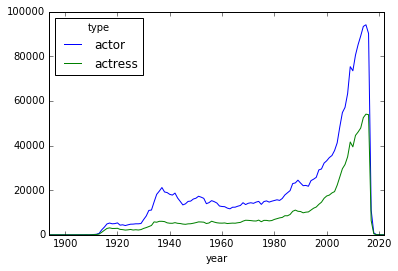

In [73]:
c.plot()

### Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

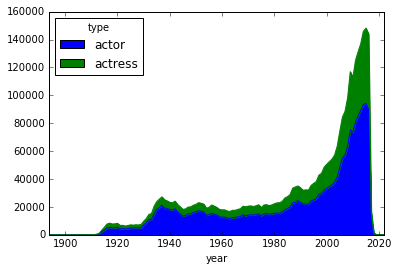

In [74]:
c.plot(kind = 'area')

### Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

In [83]:
c = cast
c = c.groupby(['year','type']).size()
c = c.unstack('type').fillna(0)
c.head()



type,actor,actress
year,,
1894,2.0,1.0
1900,2.0,0.0
1905,1.0,0.0
1906,14.0,3.0
1907,5.0,0.0


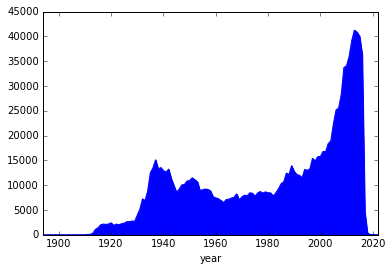

In [86]:
(c['actor'] - c['actress']).plot(kind = 'area')

### Plot the fraction of roles that have been 'actor' roles each year in the hitsory of film.

In [92]:
c = cast
c = c.groupby(['year','type']).size()
c = c.unstack('type').fillna(0)
c.head()

type,actor,actress
year,,
1894,2.0,1.0
1900,2.0,0.0
1905,1.0,0.0
1906,14.0,3.0
1907,5.0,0.0


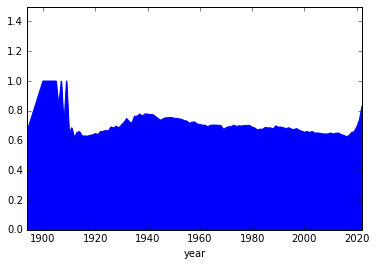

In [98]:
(c['actor'] / (c['actor'] + c['actress'])).plot(ylim = [0,1.5], kind = 'area')

### Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

In [99]:
c = cast

c = c[c.n == 2].groupby(['year','type']).size()
c = c.unstack('type').fillna(0)
c.head()

type,actor,actress
year,,
1906,2.0,1.0
1907,1.0,0.0
1908,2.0,0.0
1910,2.0,2.0
1911,14.0,6.0


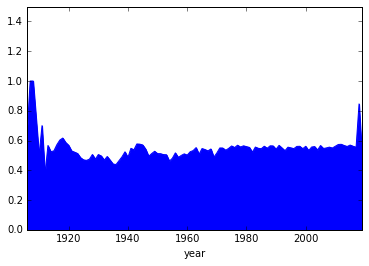

In [100]:
(c['actor'] / (c['actor'] + c['actress'])).plot(ylim = [0,1.5], kind = 'area')

### Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.

In [113]:
c = cast
c = c[(c.n >=1) & (c.n <= 3)].groupby(['year','type', 'n']).size()
c = c.unstack('type').fillna(0)
c.head()

type      actor  actress
year n                  
1906 1.0    2.0      1.0
     2.0    2.0      1.0
     3.0    0.0      1.0
1907 1.0    1.0      0.0
     2.0    1.0      0.0

In [115]:
c = (c['actor'] / (c['actor'] + c['actress']))
c.head()

year  n  
1906  1.0    0.666667
      2.0    0.666667
      3.0    0.000000
1907  1.0    1.000000
      2.0    1.000000
dtype: float64

In [126]:
c = c.unstack('n')
c.head()

n    year
1.0  1906    0.666667
     1907    1.000000
     1908    1.000000
     1909    1.000000
     1910    0.200000
dtype: float64

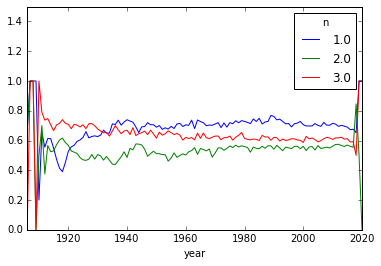

In [125]:
c.plot(ylim = [0,1.5])